In [1]:
#　导入必要的包
import csv
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster,cut_tree,cophenet,inconsistent
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from matplotlib.pyplot import xticks
import pandas as pd
from scipy.spatial import distance
from itertools import groupby #itertool还包含有其他很多函数，比如将多个list联合起来
import json
from sklearn.metrics.pairwise import euclidean_distances
import re
from orangecontrib.associate.fpgrowth import * 
from collections import Counter
from gensim.models import KeyedVectors
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score

In [2]:
'''
函数名：读数据
输入：json数据的路径
输出：每张图片用list数据存储的label集，每个图片label的评分集，以及每个图片的url
描述：该函数实现从文件中读取json数据文件，并分别解析出label集，评分集，以及url集
'''
def loadjson_label(path):
    with open (path,'rb') as json_data:
        data = json.load(json_data)
    labels = []
    
    #打印所有的labels
    for i in data:
        labels.append(i[:-1])
    classes = []
    for i in labels:
        temp = []
        for j in i:
            c = list(j[0].values())
            temp.append(c[0])
        classes.append(temp)
    
    # 打印所有的score
    score = []
    for i in labels:
        temp = []
        for j in i:
            c = list(j[1].values())
            temp.append(c[0])
        score.append(temp)

    
    #打印所有的urls
    urls = []
    for i in data:
        urls.append(list(i[-1].values())[0])    
    return classes, score, urls

In [3]:
# 读数据face
def loadjson_face(path):
    with open (path,'rb') as json_data:
        data = json.load(json_data)
    data_with_face = []
    for i in data:
        if len(i)!=1:
            data_with_face.append(i)
    rate = len(data_with_face)/len(data)
#     print ("识别出来脸总共：",len(data_with_face))
#     print ("总数据：",len(data))
    return data,data_with_face,rate

In [4]:
# 读数据color
def loadjson_color(path):
    with open (path,'rb') as json_data:
        data = json.load(json_data)
    labels = []
    # #打印所有的了labels
    for i in data:
        labels.append(i[:-1])
    temp = []
    for i in labels:
        temp_t = []
        for j in i:
            temp_t.append(j[:4])
        temp.append(temp_t)

    urls = []
    for i in data:
        urls.append(i[-1])

    datasets = []
    for i in range(0,len(temp)):
        datasets.append(list(temp[i])+list(urls[i].values()))
        
    return datasets

In [5]:
#读label
coshared_labelset, coshared_score, coshared_urls = loadjson_label('dataset\office\label\coshared.json')
print('共享办公室图片总共:',len(coshared_labelset))
open_labelset, open_score, open_urls = loadjson_label('dataset\office\label\open.json')
print ('开放式办公室图片总共:',len(open_labelset))
print('总数据量：',len(coshared_labelset)+len(open_labelset))

#读color

coshared_color = loadjson_color('dataset\office\color\coshared.json')
print('共享办公室可识别颜色图片总数：',len(coshared_color))
open_color = loadjson_color('dataset\office\color\open.json')
print('开放式办公室可识别颜色图片总数：',len(open_color))
print ('总数据量：',len(coshared_color)+len(open_color))

#读face

coshared_faceset, coshared_face, coshared_rate = loadjson_face('dataset\office\\face\coshared.json')
print('共享办公室识别出来脸的图片：',len(coshared_face))
open_faceset, open_face, open_rate = loadjson_face('dataset\office\\face\open.json')
print('开放式办公室识别出来脸的图片：',len(open_face))
print ('总共识别出来脸的图片数据量：',len(coshared_face)+len(open_face))

# # 读label
# print('====================================官方数据集label识别结果=======================================')
# official_labelset_five,official_score_five, official_urls_five = loadjson_label('dataset\official\google\label\\five.json')
# print('五星级酒店图片总共:',len(official_labelset_five))
# official_labelset_four,official_score_four, official_urls_four = loadjson_label('dataset\official\google\label\\four.json')
# print ('四星级酒店图片总共:',len(official_labelset_four))
# official_labelset_three,official_score_three, official_urls_three = loadjson_label('dataset\official\google\label\\three.json')
# print ('三星级酒店图片总共:',len(official_labelset_three))
# official_labelset_two,official_score_two, official_urls_two = loadjson_label('dataset\official\google\label\\two.json')
# print ('二星级酒店图片总共:',len(official_labelset_two))
# print('总数据量：',len(official_labelset_five)+len(official_labelset_four)+len(official_labelset_three)+len(official_labelset_two))

# # 读color
# print('=====================================官方数据集color识别结果========================================')
# official_colorset_five = loadjson_color('dataset\official\google\color\\five.json')
# print('五星级酒店可识别颜色图片总数：',len(official_colorset_five))
# official_colorset_four = loadjson_color('dataset\official\google\color\\four.json')
# print('四星级酒店可识别颜色图片总数：',len(official_colorset_four))
# official_colorset_three= loadjson_color('dataset\official\google\color\\three.json')
# print('三星级酒店可识别颜色图片总数：',len(official_colorset_three))
# official_colorset_two= loadjson_color('dataset\official\google\color\\two.json')
# print('二星级酒店可识别颜色图片总数：',len(official_colorset_two))
# print ('总数据量：',len(official_colorset_five)+len(official_colorset_four)+len(official_colorset_three)+len(official_colorset_two))

# # 读face
# print ('======================================官方数据集face识别结果=======================================')
# #其中faceset_five表示五星级酒店总数据，face_five表示识别出来脸的图片集，rate_five表示评分
# official_faceset_five,official_face_five,official_rate_five = loadjson_face('dataset\official\google\\face\\five.json')
# print('五星级酒店识别出来脸的图片：',len(official_face_five))
# official_faceset_four,official_face_four,official_rate_four = loadjson_face('dataset\official\google\\face\\four.json')
# print('四星级酒店识别出来脸的图片：',len(official_face_four))
# official_faceset_three,official_face_three,official_rate_three = loadjson_face('dataset\official\google\\face\\three.json')
# print('三星级酒店识别出来脸的图片：',len(official_face_three))
# official_faceset_two,official_face_two,official_rate_two = loadjson_face('dataset\official\google\\face\\two.json')
# print('二星级酒店识别出来脸的图片：',len(official_face_two))
# print ('总共识别出来脸的图片数据量：',len(official_face_five)+len(official_face_four)+len(official_face_three)+len(official_face_two))

共享办公室图片总共: 1287
开放式办公室图片总共: 356
总数据量： 1643
共享办公室可识别颜色图片总数： 1287
开放式办公室可识别颜色图片总数： 356
总数据量： 1643
共享办公室识别出来脸的图片： 218
开放式办公室识别出来脸的图片： 7
总共识别出来脸的图片数据量： 225


In [6]:
'''
函数名：数据预处理
输入：label集，url
输出：经过处理的label集，并将url并进去
描述：通过该函数将获取到的数据集进行预处理。1.去掉空格，2.去掉括号，3.将url添加上。
'''
def preprocessing(labelset,urls):
#     i=0
#     for labels in labelset:
#         labels.append(urls[i])
#         i+=1
    sets_ini = []
    for i in labelset:
        inter_sets = []
        for j in i:
#             j = j.replace(' ','')                          # 去掉空格
            j = j.split(' ')[-1] 
            inter_sets.append(re.sub('\((.*?\))', '', j))  # 去掉括号
        sets_ini.append(inter_sets)
    return sets_ini

In [7]:
#　对数据集进行预处理

coshared_ini = preprocessing(coshared_labelset,coshared_urls)
print ("共享办公室图片数据集个数 = ", len (coshared_ini))
open_ini = preprocessing(open_labelset,open_urls)
print ("开放式办公室图片数据集个数 = ", len (open_ini))

共享办公室图片数据集个数 =  1287
开放式办公室图片数据集个数 =  356


In [8]:
'''所有标签统计'''
all_labels_set = coshared_ini + open_ini 

In [9]:
# 取出所有的label
'''
函数名：取出所有label并进行统计
输入：每个图片的label list
输出：每个数据集中的label集合，数据集label统计并排序之后的结果
描述：对之前的图片的label list中的label先取出来，然后进行统计每个label在整个数据集中出现的百分比
'''
def label_stat(sets_ini):
#     all_sets = [] # 存放c不带url的数据集
#     for i in sets_ini:
#         all_sets.append(i[:-1])
#     label_all = [] # 存放所有label
#     for i in all_sets:
#         for j in i:
#             label_all.append(j)  
    label_all = [] # 存放所有label
    for i in sets_ini:
        for j in i:
            label_all.append(j)   
    #数据集长度定义
    length = len(sets_ini)
    #数据集每个label计数
    c = Counter(label_all)
    stat_sets = []
    for i in c.items():
        stat_sets.append([i[0],round(i[1]/length,5)])
    # 数据集label 频率排序    
    n = len(stat_sets)
    for i in range(n-1):
        for j in range(n-i-1):
            if stat_sets[j][1]<stat_sets[j+1][1]:
                stat_sets[j],stat_sets[j+1] = stat_sets[j+1],stat_sets[j]
    return label_all, stat_sets

In [10]:
len(all_labels_set)

1643

In [11]:
#official_label_all_five表示五星级酒店出现的标签，official_stat_five表示五星级酒店每个词以及这个词出现的频率

coshared_label_all, coshared_stat = label_stat(coshared_ini)
print ("共享办公室数据集label个数 = ",len(coshared_stat))
open_label_all,open_stat = label_stat(open_ini)
print ("开放式数据集label个数 = ",len(open_stat))

print ('================================所有标签统计============================================')
all_labels,all_labels_stat = label_stat(all_labels_set)
print ('所有label个数 = ', len(all_labels_stat))

共享办公室数据集label个数 =  412
开放式数据集label个数 =  91
================================所有标签统计============================================
所有label个数 =  424


In [12]:
type(coshared_stat)

coshared_stat_df = pd.DataFrame(np.array(coshared_stat[:50]).T)
print (coshared_stat_df)

        0          1        2        3        4         5        6        7   \
0   design  furniture    table   office     room  flooring    floor   estate   
1  0.70163    0.48019  0.40715  0.29138  0.25719   0.24165  0.21368  0.19736   

        8        9   ...          40       41       42       43       44  \
0  ceiling   window  ...  recreation      fun     roof   facade     city   
1  0.16162  0.15229  ...      0.0272  0.02486  0.02486  0.02253  0.02176   

        45       46      47        48       49  
0      art  vehicle    door  training     girl  
1  0.02098   0.0202  0.0202    0.0202  0.01943  

[2 rows x 50 columns]


In [13]:
print ('==========================================================================================')
print ('共享办公室图片出现频率前50：')
print (coshared_stat[:50])

print ('==========================================================================================')
print ('2,3星级酒店官方图片出现频率前50：')
print (open_stat[:50])

print ('==========================================================================================')
print ('所有图片出现频率前50：')
print (all_labels_stat[:50])

共享办公室图片出现频率前50：
[['design', 0.70163], ['furniture', 0.48019], ['table', 0.40715], ['office', 0.29138], ['room', 0.25719], ['flooring', 0.24165], ['floor', 0.21368], ['estate', 0.19736], ['ceiling', 0.16162], ['window', 0.15229], ['daylighting', 0.12821], ['chair', 0.12665], ['house', 0.12277], ['hall', 0.11267], ['restaurant', 0.08625], ['desk', 0.08547], ['architecture', 0.08392], ['loft', 0.08236], ['communication', 0.07848], ['product', 0.07304], ['home', 0.07226], ['lobby', 0.06915], ['angle', 0.06605], ['building', 0.05828], ['classroom', 0.05517], ['property', 0.05284], ['wood', 0.05206], ['apartment', 0.05051], ['device', 0.04895], ['glass', 0.04895], ['structure', 0.04662], ['plant', 0.04584], ['technology', 0.04429], ['wall', 0.04351], ['café', 0.04118], ['area', 0.03186], ['tree', 0.03108], ['conversation', 0.03108], ['exhibition', 0.02875], ['job', 0.0272], ['recreation', 0.0272], ['fun', 0.02486], ['roof', 0.02486], ['facade', 0.02253], ['city', 0.02176], ['art', 0.02098], 

In [14]:
for i in all_labels_stat[:50]:
    print (i[1])

0.71333
0.46135
0.36884
0.36093
0.22155
0.20937
0.20572
0.18198
0.17833
0.17103
0.12173
0.11199
0.11138
0.10347
0.09495
0.08338
0.08156
0.07791
0.07243
0.0706
0.06817
0.06269
0.05965
0.0566
0.04747
0.04565
0.04443
0.04321
0.04139
0.04139
0.04078
0.04017
0.03591
0.0353
0.03408
0.03226
0.02739
0.02739
0.02556
0.02435
0.02435
0.02435
0.0213
0.0213
0.02009
0.01948
0.01826
0.01826
0.01765
0.01704


In [15]:
# histogram 对co shared 数据集进行统计
'''
函数名：画统计图
输入：统计后的数据集，图名
输出：统计图
描述：该函数用来画统计图
'''
def hist_bar(sets,title):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    X = []
    for i in sets[:20]:
        X.append(i[0])
    # print (co_X)
    Y = []
    for i in sets[:20]:
        Y.append(i[1])
    
    fig = plt.figure()
    plt.bar(X,Y,0.6,color="green")
    plt.xlabel("标签名",family = 'FangSong',weight='bold',size=14)
    plt.xticks(rotation=90)
  
    plt.ylabel("频率",family = 'FangSong',size=14)
#     plt.title(title+ "标签统计结果",fontsize=16)
    plt.tick_params(axis='both',which='major',labelsize=14.5)
    plt.savefig(r'./导出的图片/'+title+'20.png',dpi=200,bbox_inches = 'tight')
    plt.show() 
        
#     fig = plt.figure()
#     plt.bar(X,Y,0.6,color="green")
#     plt.xlabel("标签名")
#     plt.xticks(rotation=80)
#     plt.ylabel("频率")
#     plt.title(title+ "标签统计结果",fontsize=16)
#     plt.tick_params(axis='both',which='major',labelsize=9)
#     plt.savefig(r'./导出的图片/办公室/'+title+'.png',dpi=300,bbox_inches = 'tight')
#     plt.show() 

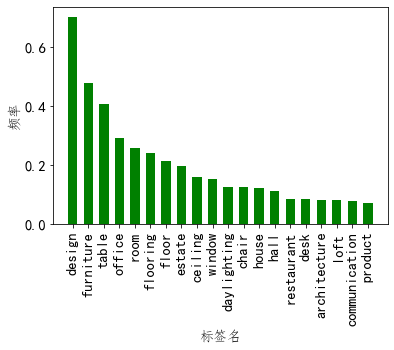

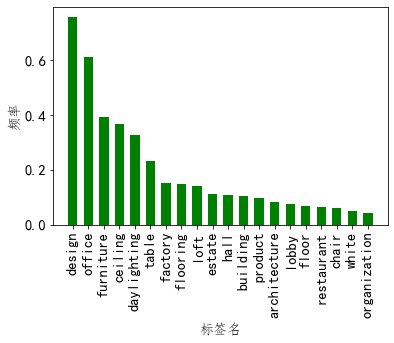

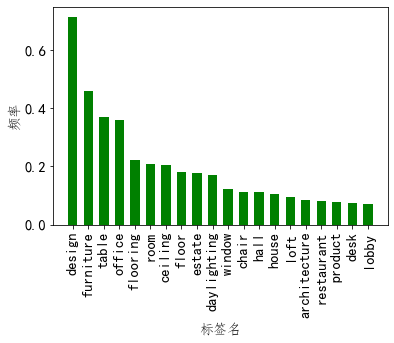

In [16]:
hist_bar(coshared_stat,'共享办公室数据集')
hist_bar(open_stat,'开放式办公室数据集')
hist_bar(all_labels_stat,'办公室总数据集')

In [17]:
# google news
# GOOGLENEWS_FILE_GLOVE = 'C:\\Users\TF\Desktop\BunCode\GoogleNews-vectors-negative300.bin'
GOOGLENEWS_FILE_GLOVE = 'E:\毕业论文\BunCode\GoogleNews-vectors-negative300.bin'

def word_embedding_to_vector(path,word_set):
    print('starting')
    embeddings = {}
    embeddings_process=KeyedVectors.load_word2vec_format(path, binary=True)
    
    for word in word_set:
        if word in embeddings_process.vocab:
            embeddings[word]=embeddings_process.word_vec(word)
        else:
            pass
    print ('ending')
    return embeddings

In [38]:
all_embedding = word_embedding_to_vector(GOOGLENEWS_FILE_GLOVE,all_labels)

starting
ending


In [39]:
import pickle
# all_embedding_file = pickle.dumps(all_embedding)

with open('all_embedding_office.pickle', 'wb') as f:
    pickle.dump(all_embedding, f, protocol=pickle.HIGHEST_PROTOCOL)

In [40]:
with open('all_embedding_office.pickle', 'rb') as f:
    all_embedding = pickle.load(f)

In [41]:
type(all_embedding)

dict

In [42]:
def divided (res_emb):
    # 对于可以得到词向量的元素
    mat = [] # 存词向量
    for val in res_emb.values():
        mat.append(val)
    mat_key = [] # 存key值
    for ke in res_emb.keys():
        mat_key.append(ke)
    return mat,mat_key

In [43]:
all_mat,all_key = divided(all_embedding)

In [20]:
# 进行层次聚类
def hierarchy_cluster(data, method='average', threshold=5.0):
    '''层次聚类
    Arguments:
        data [[0, float, ...], [float, 0, ...]] -- 文档 i 和文档 j 的距离
    Keyword Arguments:
        method {str} -- [linkage的方式： single、complete、average、centroid、median、ward] (default: {'average'})
        threshold {float} -- 聚类簇之间的距离
    Return:
        cluster_number int -- 聚类个数
        cluster [[idx1, idx2,..], [idx3]] -- 每一类下的索引
    '''
    data = np.array(data)
    Z = linkage(data, method=method)
    cluster_assignments = fcluster(Z, threshold, criterion='distance')
    num_clusters = cluster_assignments.max()
    indices = get_cluster_indices(cluster_assignments)
    return num_clusters, indices

In [21]:
# 对于聚类结果进行映射
def get_cluster_indices(cluster_assignments):
    '''映射每一类至原数据索引
    Arguments:
        cluster_assignments 层次聚类后的结果
    Returns:
        [[idx1, idx2,..], [idx3]] -- 每一类下的索引
    '''
    n = cluster_assignments.max()
#     print ("n = ",n)
    indices = []
    for cluster_number in range(1, n + 1):
        indices.append(np.where(cluster_assignments == cluster_number)[0])
    return indices

[[178.         330.           1.33845811   2.        ]
 [183.         212.           1.49042397   2.        ]
 [ 31.          72.           1.79104043   2.        ]
 ...
 [823.         832.          10.38515014 104.        ]
 [805.         835.          10.81512595 316.        ]
 [836.         837.          13.33626997 420.        ]]


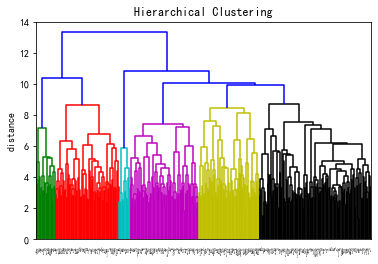

In [22]:
arr = np.array(all_mat)
# r, c = arr.shape
# num_clusters, indices = hierarchy_cluster(arr)
# for k, ind in enumerate(indices):
#     lab = []
#     for ttt in ind:
#         lab.append(mat_key[ttt])
arr = pd.DataFrame(arr)
# 利用scipy包进行层次聚类
Z = linkage(arr, method ='ward',metric='euclidean')


print (Z)
plt.title('Hierarchical Clustering')
plt.ylabel('distance')
max_d = 150
t = dendrogram(Z,labels = all_key,
               truncate_mode='lastp',  # show only the last p merged clusters
               p=2000,  # show only the last p merged clusters
               leaf_rotation=90.,
               leaf_font_size=1.4,
               show_leaf_counts=True,
               show_contracted=True, # to get a distribution impression in truncated branches
              )
# plt.savefig(r'./导出的图片/all_label.png', dpi=800)
plt.show()

In [24]:
from sklearn.metrics.pairwise import rbf_kernel

In [33]:
# def fancy_dendrogram(*args, **kwargs):
#     max_d = kwargs.pop('max_d', None)
#     if max_d and 'color_threshold' not in kwargs:
#         kwargs['color_threshold'] = max_d
#     annotate_above = kwargs.pop('annotate_above', 0)
#     ddata = dendrogram(*args, **kwargs)
#     if not kwargs.get('no_plot', False):
#         plt.title('Hierarchical Clustering Dendrogram (truncated)')
#         plt.xlabel('sample index or (cluster size)')
#         plt.ylabel('distance')
#         for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
#             x = 0.5 * sum(i[1:3])
#             y = d[1]
#             if y > annotate_above:
#                 plt.plot(x, y, 'o', c=c)
#                 plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
#                              textcoords='offset points',
#                              va='top', ha='center')
#         if max_d:
#             plt.axhline(y=max_d, c='k')
#     return ddata

In [34]:
# arr = np.array(all_mat)
# arr = pd.DataFrame(arr)
# rbf =  rbf_kernel(arr,gamma=0.2)
# Z = linkage(rbf, method ='ward')#,metric=rbf)#('euclidean')

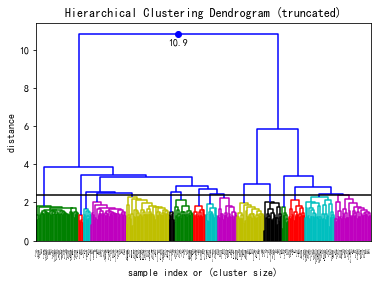

In [35]:
# figure1 = (fancy_dendrogram(
#     Z,
#     labels = all_key,
#     truncate_mode='lastp',
#     p=2000,
#     leaf_rotation=90.,
#     leaf_font_size=2.2,
#     show_contracted=True,
#     annotate_above=10,
#     max_d= 2.4,  # plot a horizontal cut-off line
# ))

In [25]:
arr = np.array(all_mat)
# r, c = arr.shape
# num_clusters, indices = hierarchy_cluster(arr)
# for k, ind in enumerate(indices):
#     lab = []
#     for ttt in ind:
#         lab.append(mat_key[ttt])



arr = pd.DataFrame(arr)
# 利用scipy包进行层次聚类

# lp = laplacian_kernel(arr,gamma=0.05)
rbf =  rbf_kernel(arr,gamma=0.5)
Z = linkage(rbf, method ='ward')#,metric=rbf)#('euclidean')

cluster_n = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
silhouette_avg = []
for i in cluster_n:
    cluster = sch.fcluster(Z,t=i,criterion='maxclust') 
    silhouette_avg.append(davies_bouldin_score(all_mat, cluster))
print (silhouette_avg)

[6.770120323749862, 5.059561689795608, 4.160075977113753, 3.708823520485043, 3.354344557680815, 3.1615294753966365, 2.9404805755538574, 2.8164373677939363, 2.660272629562456, 2.541208534343996, 2.4501808661079663, 2.377721513245435, 2.377207473214441, 3.20360672013206, 3.100739337917699, 3.127996464584754, 3.050886509310386, 3.082388398298216, 3.0360352136883866, 2.9829394101720603, 2.970765418592197, 2.9076733698490718, 2.8825432308733254]


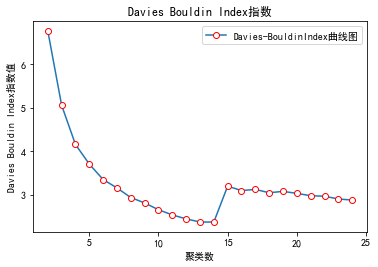

In [26]:
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']

# distances = [8,9,10,11,12,13,14,15,16]
# cluster_n = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]

# dbi_list = [1622.4592050715905, 1502.149736283232, 1469.7160379962177, 1370.619858904026, 1246.7293342334567, 684.668871309834, 802.5160147681532, 1144.8552821387746, 1081.5971861525102]

plt.plot(cluster_n, silhouette_avg, marker='o', mec='r', mfc='w',label=u'Davies-BouldinIndex曲线图')
plt.legend()  # 让图例生效
# plt.xticks(distance, names, rotation=45)
# plt.margins(0)
plt.subplots_adjust(bottom=0.15)
plt.xlabel(u"聚类数") #X轴标签
plt.ylabel("Davies Bouldin Index指数值") #Y轴标签
plt.title("Davies Bouldin Index指数") #标题
plt.savefig(r'./导出的图片/办公室/DBI.pdf',dpi=300,bbox_inches = 'tight')
plt.savefig(r'./导出的图片/办公室/DBI.png',dpi=300,bbox_inches = 'tight')

plt.show()

In [35]:
cluster_result = sch.fcluster(Z,t=14,criterion='maxclust') 
clustering_dict = dict(zip(all_key,cluster_result))

In [36]:
clustering_dict

{'plant': 6,
 'tree': 6,
 'girl': 14,
 'countertop': 6,
 'room': 6,
 'kitchen': 6,
 'design': 6,
 'table': 6,
 'furniture': 6,
 'flooring': 6,
 'office': 6,
 'ceiling': 6,
 'classroom': 6,
 'desk': 6,
 'job': 6,
 'area': 13,
 'city': 13,
 'skyscraper': 6,
 'building': 6,
 'metropolis': 6,
 'condominium': 6,
 'skyline': 6,
 'block': 6,
 'use': 12,
 'window': 6,
 'estate': 6,
 'daylighting': 6,
 'space': 6,
 'street': 6,
 'road': 6,
 'sidewalk': 6,
 'vehicle': 2,
 'art': 6,
 'arts': 6,
 'cafeteria': 6,
 'restaurant': 6,
 'court': 12,
 'lobby': 6,
 'property': 6,
 'house': 14,
 'architecture': 6,
 'home': 14,
 'structure': 6,
 'facade': 6,
 'hall': 6,
 'chair': 6,
 'floor': 6,
 'wood': 6,
 'sports': 6,
 'billiards': 6,
 'games': 12,
 'pool': 6,
 'wall': 6,
 'hardwood': 6,
 'plywood': 6,
 'stain': 6,
 'apartment': 14,
 'communication': 6,
 'conversation': 6,
 'sitting': 12,
 'fun': 6,
 'lighting': 6,
 'accessory': 6,
 'fixture': 6,
 'lampshade': 6,
 'decor': 6,
 'yellow': 9,
 'arm': 6,
 'l

In [37]:
#构建字典
dict_keys = {}
for i in clustering_dict.values():
    dict_keys[i] = []

In [41]:
#将类别分门别类存入字典中
keys_label = []      
cluster_label = []
for i in clustering_dict.keys():
    keys_label.append(i)
for i in clustering_dict.values():
    cluster_label.append(i)

total = []
for i in range(0,len(keys_label)):
    total.append([keys_label[i],cluster_label[i]])
    
for i in total:
    for j in dict_keys.keys():
        if i[1] == j:
            dict_keys[j].append(i[0])

In [42]:
print (dict_keys)

{6: ['plant', 'tree', 'countertop', 'room', 'kitchen', 'design', 'table', 'furniture', 'flooring', 'office', 'ceiling', 'classroom', 'desk', 'job', 'skyscraper', 'building', 'metropolis', 'condominium', 'skyline', 'block', 'window', 'estate', 'daylighting', 'space', 'street', 'road', 'sidewalk', 'art', 'arts', 'cafeteria', 'restaurant', 'lobby', 'property', 'architecture', 'structure', 'facade', 'hall', 'chair', 'floor', 'wood', 'sports', 'billiards', 'pool', 'wall', 'hardwood', 'plywood', 'stain', 'communication', 'conversation', 'fun', 'lighting', 'accessory', 'fixture', 'lampshade', 'decor', 'arm', 'leisure', 'sky', 'cityscape', 'angle', 'landmark', 'downtown', 'device', 'balcony', 'loft', 'clothing', 'smile', 'text', 'font', 'material', 'paper', 'tap', 'sink', 'couch', 'comfort', 'roof', 'daytime', 'dish', 'food', 'cuisine', 'appetizer', 'bicycle', 'wheel', 'equipment', 'cycling', 'door', 'exhibition', 'frame', 'bed', 'mattress', 'glass', 'bathroom', 'shower', 'tile', 'square', 'st

In [43]:
'''
该函数主要将每个图片所打的标签转化为聚类中的每个类的类名
输入：聚类所得到的字典，需要转化的list
输出：转化结果
'''
def list_revert_into_clustering(dict_result,revert_list):
    cluster_id_list=[]
    for j in revert_list:
        temp = []
        for k in j:
            for i in dict_result.values():
                if k in i:
                    temp.append(list(dict_result.keys())[list(dict_result.values()).index(i)])
        if temp == []:
            continue
        temp = set(temp)
        cluster_id_list.append(list(temp))
    return cluster_id_list

In [45]:
coshared_cluster_list_result = list_revert_into_clustering(dict_keys,coshared_ini)
open_cluster_list_result = list_revert_into_clustering(dict_keys,open_ini)
all_result = coshared_cluster_list_result + open_cluster_list_result

In [46]:
len(coshared_cluster_list_result)

1211

In [47]:
len(open_cluster_list_result)

343

In [67]:
def fre_itemsets(a,b,c,delta):# co shared 频繁项集其中delta表示阈值
    co_length= len(a)
    co_itemsets = frequent_itemsets(a, delta)
    co_itemlist=list(co_itemsets)
    co_frequentItem = [(item[0],item[1]/co_length) for item in co_itemlist]
    print (len (co_frequentItem))

    # open place 频繁项集
    open_length= len(b)
    open_itemsets = frequent_itemsets(b, delta)
    open_itemlist=list(open_itemsets)
    open_frequentItem = [(item[0],item[1]/open_length) for item in open_itemlist]
    print (len (open_frequentItem))

    # open place 和 co shared 频繁项集
    length= len(c)
    itemsets = frequent_itemsets(c, delta)
    itemlist=list(itemsets)
    frequentItem = [(item[0],item[1]/length) for item in itemlist]
    print (len (frequentItem))
    return co_frequentItem,open_frequentItem,frequentItem

In [68]:
coshared_fre_result, open_fre_result, all_fre_result = fre_itemsets(coshared_cluster_list_result,open_cluster_list_result,all_result,0.001)

77
34
85


In [69]:
# co_frequent = list(frequent_itemsets(coshared_cluster_list_result,0.00015))
# open_frequent = list(frequent_itemsets(open_cluster_list_result,0.00015))

In [70]:
#根据support值排序
def sortbysup(result):
    n = len(result)
    for i in range(n-1):
        for j in range(n-i-1):
            if result[j][1]<result[j+1][1]:
                result[j],result[j+1] = result[j+1],result[j]
#     print ("result = ",result)
    return result

def sortbysup_1(result):
    n = len(result)
    for i in range(n-1):
        for j in range(n-i-1):
            if result[j][3]<result[j+1][3]:
                result[j],result[j+1] = result[j+1],result[j]
#     print ("result = ",result)
    return result   

# 按照频繁项集长度排序
def sortbylen(result):
    n = len(result)
    for i in range(n-1):
        for j in range(n-i-1):
            if len(result[j][0])>len(result[j+1][0]):
                result[j],result[j+1] = result[j+1],result[j]
#     print ("result = ",result)
    return result

In [71]:
co_fre_sort = sortbysup(coshared_fre_result)
open_fre_sort = sortbysup(open_fre_result)
all_fre_sort = sortbysup(all_fre_result)

In [75]:
# co_support = sortbysup(quchong(fre_item(preprocessing_A)))
# open_support = sortbysup(quchong(fre_item(preprocessing_B)))
# support = sortbysup(quchong(fre_item(preprocessing_A+preprocessing_B)))
co_support=co_fre_sort
open_support=open_fre_sort
support = all_fre_sort


fre_co = []
for i in co_support:
    fre_co.append(i[0])
# print (fre_co)

# print ("======================================================================")
fre_open = []
for i in open_support:
    fre_open.append(i[0])
# print (fre_open)

# 找出两边都包含的itemsets
ppp = [l for l in fre_co if l in fre_open]
# print (ppp)

a = []
for i in ppp:
    for j in co_support:
        if i == j[0]:
            a.append([i,j[1]])
# print (a)

b = []
for i in ppp:
    for j in open_support:
        if i == j[0]:
            b.append([i,j[1]])
# print (b)

co_contrast_ratio = []
for i in range(0,len(ppp)):
    co_contrast_ratio.append([ppp[i],round(a[i][1],5),round(b[i][1],5),round(a[i][1]/b[i][1],5)])
    
# 第一个表示a里面的support值 (coshared)，第二个表示b里面的support值（open plan office），第三个表示a/b的contrast值。
# print ("contrast ratio A > B = ",co_contrast_ratio)

print ("排序1：  ",sortbysup_1(co_contrast_ratio))

open_contrast_ratio = []
for i in range(0,len(ppp)):
    open_contrast_ratio.append([ppp[i],round(b[i][1],5),round(a[i][1],5),round(b[i][1]/a[i][1],5)])#表示b/a的congtrast值
# print ("contrast ratio B > A = ",open_contrast_ratio)
print('================================================================================================')
print ("排序2：   ",sortbysup_1(open_contrast_ratio))



contrast_diff = []
for i in range(0,len(ppp)):
    contrast_diff.append([ppp[i],abs(round(a[i][1]-b[i][1],16))])
# print ("contrast different = ", contrast_diff)

排序1：   [[frozenset({3, 12}), 0.01321, 0.00292, 4.53179], [frozenset({3, 12, 6}), 0.01321, 0.00292, 4.53179], [frozenset({13, 6}), 0.03799, 0.00875, 4.34297], [frozenset({13}), 0.03964, 0.01166, 3.39884], [frozenset({14}), 0.20644, 0.06414, 3.2186], [frozenset({14, 6}), 0.20644, 0.06414, 3.2186], [frozenset({2, 12}), 0.00826, 0.00292, 2.83237], [frozenset({3}), 0.0223, 0.00875, 2.54913], [frozenset({3, 6}), 0.0223, 0.00875, 2.54913], [frozenset({12, 13}), 0.01239, 0.00583, 2.12428], [frozenset({12, 13, 6}), 0.01239, 0.00583, 2.12428], [frozenset({2, 6}), 0.01817, 0.00875, 2.07707], [frozenset({2}), 0.01817, 0.01166, 1.5578], [frozenset({12, 6}), 0.18993, 0.12245, 1.55106], [frozenset({12}), 0.19158, 0.12536, 1.52816], [frozenset({6}), 0.9967, 0.99417, 1.00254], [frozenset({8, 12}), 0.0033, 0.00875, 0.37765], [frozenset({8, 12, 6}), 0.0033, 0.00875, 0.37765], [frozenset({8}), 0.01321, 0.04956, 0.26658], [frozenset({8, 6}), 0.01321, 0.04956, 0.26658], [frozenset({11}), 0.00495, 0.04373, 0

In [113]:
arr = np.array(all_mat)
# r, c = arr.shape
# num_clusters, indices = hierarchy_cluster(arr)
# for k, ind in enumerate(indices):
#     lab = []
#     for ttt in ind:
#         lab.append(mat_key[ttt])

arr = pd.DataFrame(arr)
# 利用scipy包进行层次聚类
# Z = linkage(arr, method ='average',metric='euclidean')

rbf =  rbf_kernel(arr,gamma=-2.1)
Z = linkage(rbf, method ='ward')#,metric=rbf)#('euclidean')

# cluster = sch.fcluster(Z,t=5,criterion='maxclust') 
# print (len(cluster))
# print (len(all_key))

cluster_n = list(range(20))[2:]
silhouette_avg = []
for i in cluster_n:
    cluster = sch.fcluster(Z,t=i,criterion='maxclust') 
    silhouette_avg.append(silhouette_score(all_mat, cluster,metric='euclidean'))
print (silhouette_avg)

# arr = pd.DataFrame(arr)
# # 利用scipy包进行层次聚类
# Z = linkage(arr, method ='ward',metric='euclidean')


# cluster = sch.fcluster(Z,t=5,criterion='maxclust') 
# print (len(cluster))
# print (len(all_key))

# cluster_n = list(range(30))[2:]
# silhouette_avg = []
# for i in cluster_n:
#     cluster = sch.fcluster(Z,t=i,criterion='maxclust') 
#     silhouette_avg.append(silhouette_score(all_mat, cluster,metric='euclidean'))
# print (silhouette_avg)

[0.17332233, 0.14340095, 0.11292338, 0.102160946, 0.098218665, 0.09041389, 0.087646015, 0.07883462, 0.057579294, 0.051997725, 0.05099181, 0.036105383, 0.031117095, 0.026949044, 0.026498169, 0.021356406, 0.01821286, 0.014595953]


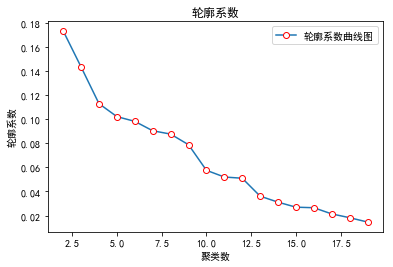

In [114]:
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']

# distances = [8,9,10,11,12,13,14,15,16]

# dbi_list = [1622.4592050715905, 1502.149736283232, 1469.7160379962177, 1370.619858904026, 1246.7293342334567, 684.668871309834, 802.5160147681532, 1144.8552821387746, 1081.5971861525102]

plt.plot(cluster_n, silhouette_avg, marker='o', mec='r', mfc='w',label=u'轮廓系数曲线图')
plt.legend()  # 让图例生效
# plt.xticks(distance, names, rotation=45)
# plt.margins(0)
plt.subplots_adjust(bottom=0.15)
plt.xlabel(u"聚类数") #X轴标签
plt.ylabel("轮廓系数") #Y轴标签
plt.title("轮廓系数") #标题
plt.savefig(r'./导出的图片/办公室/轮廓系数.pdf',dpi=300,bbox_inches = 'tight')
plt.savefig(r'./导出的图片/办公室/轮廓系数.png',dpi=300,bbox_inches = 'tight')

plt.show()

In [191]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    ddata = dendrogram(*args, **kwargs)
    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [192]:
# 计算DBI指数
def compute_s(i, x, clusters):
    norm_c= len(clusters)
    s = 0
    for x in clusters:
        s += distance.euclidean(x, clusters[i])
    return s
def compute_Rij(i, j, x, clusters, nc):
    Rij = 0
    try:
        d = distance.euclidean(clusters[i],clusters[j])
        Rij = (compute_s(i, x, clusters) + compute_s(j, x, clusters))/d
    except:
        Rij = 0
    return Rij
def compute_R(i, x, clusters, nc): 
    list_r = []
    for i in range(nc):
        for j in range(nc):
            if(i!=j):
                temp = compute_Rij(i, j, x, clusters, nc)
                list_r.append(temp)
    return max(list_r)
def compute_DB_index(x, clusters, nc):
    sigma_R = 0.0
    for i in range(nc):
        sigma_R = sigma_R + compute_R(i, x, clusters, nc)
    DB_index = float(sigma_R)/float(nc)
    return DB_index

['night', 'evening', 'pink', 'blue', 'white', 'black', 'yellow', 'orange', 'vehicle', 'car', 'seminar', 'workshop', 'instrument', 'instruments', 'spring', 'winter', 'sea', 'ocean', 'estate', 'girl', 'child', 'mother', 'family', 'desk', 'brick', 'property', 'office', 'building', 'structure', 'house', 'home', 'apartment', 'bedroom', 'suburb', 'metropolis', 'pergola', 'patio', 'porch', 'road', 'alley', 'street', 'sidewalk', 'courtyard', 'plaza', 'downtown', 'community', 'area', 'city', 'town', 'hanger', 'bookcase', 'closet', 'drawer', 'drawers', 'monochrome', 'turquoise', 'flowerpot', 'lamp', 'lampshade', 'tablecloth', 'daytime', 'worker', 'receptionist', 'trailer', 'boutique', 'salon', 'plant', 'factory', 'headquarters', 'warehouse', 'retail', 'shopping', 'store', 'mall', 'bridge', 'pedestrian', 'train', 'bicycle', 'cycling', 'condominium', 'loft', 'graphics', 'studio', 'sports', 'leisure', 'recreation', 'percussion', 'music', 'entertainment', 'musician', 'piano', 'pianist', 'multimedia'

ValueError: max() arg is an empty sequence

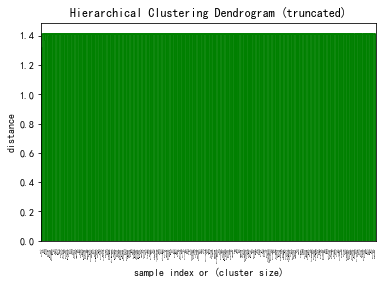

In [193]:
dbi_list = []
cluster_list = []
distances = [3,4,5,6,7,8,9,10,11,12,13]
for distance_d in distances:
    figure1 = (fancy_dendrogram(
        Z,
        labels = all_key,
        truncate_mode='lastp',
        p=2000,
        leaf_rotation=90.,
        leaf_font_size=2.2,
        show_contracted=True,
        annotate_above=10,
        max_d= distance_d,  # plot a horizontal cut-off line
    ))
    values_figure = []
    for fig in figure1.values():
        values_figure.append(fig)

    x_list = values_figure[2]
    x_index = values_figure[3]
    x_color = values_figure[4]
    x_color.insert(0,x_color[0])
    
    print (x_list)
    print (x_index)
    print (x_color)
    
#     将不同cluster元素放一起（color_list）
    clu = [(list(v)) for k,v in groupby(x_color)]
    disp = []
    a = 0
    for strin in range(0,len(x_index)):
        x_index[strin] = str(x_index[strin])   
    for c in clu:
        temp = []
        for l in range(0,len(c)):
            if a>len(x_color):
                break
            t = l+a
            temp.append(x_index[t])
        a += len(c)
        disp.append(temp)  
    
    # 按cluster将词分好
    disp_list = [] # 存放分好的词
    a = 0
    for c in clu:
        temp = []
        for l in range(0,len(c)):
            if a>len(x_color):
                break
            t = l+a
            temp.append(x_list[t])
        a += len(c)
        disp_list.append(temp)
    n_clusters = len(disp_list)   
    # 按cluster将词的index分好
    for strin in range(0,len(x_index)):
        x_index[strin] = int(x_index[strin])
    
    disp_values = []        
    a = 0
    for c in disp:
        temp = []
        for l in range(0,len(c)):
            if a>len(x_color):
                break
            t = l+a
            temp.append(all_mat[x_index[t]])
        a += len(c)
        disp_values.append(temp)
        
    #计算每个簇的中心点
    centroids = []
    for j in range(0,len(disp_values)):
        numm = 0
        for i in disp_values[j]:
            numm += i
        centroids.append(numm)
        
    # DBI值
    index_db_val = compute_DB_index(all_mat, centroids, n_clusters)
    dbi_list.append(index_db_val)
    cluster_list.append(n_clusters)
    
print (dbi_list)
print (cluster_list)

ValueError: x and y must have same first dimension, but have shapes (14,) and (8,)

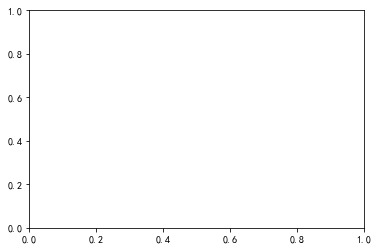

In [36]:
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']

# distances = [8,9,10,11,12,13,14,15,16]

# dbi_list = [1622.4592050715905, 1502.149736283232, 1469.7160379962177, 1370.619858904026, 1246.7293342334567, 684.668871309834, 802.5160147681532, 1144.8552821387746, 1081.5971861525102]

plt.plot(distances, dbi_list, marker='o', mec='r', mfc='w',label=u'Davies-BouldinIndex曲线图')
plt.legend()  # 让图例生效
# plt.xticks(distance, names, rotation=45)
# plt.margins(0)
plt.subplots_adjust(bottom=0.15)
plt.xlabel(u"distance") #X轴标签
plt.ylabel("Davies Bouldin Index指数值") #Y轴标签
plt.title("Davies Bouldin Index指数") #标题
plt.savefig(r'./导出的图片/DBI.pdf',dpi=300,bbox_inches = 'tight')
plt.savefig(r'./导出的图片/DBI.png',dpi=300,bbox_inches = 'tight')

plt.show()

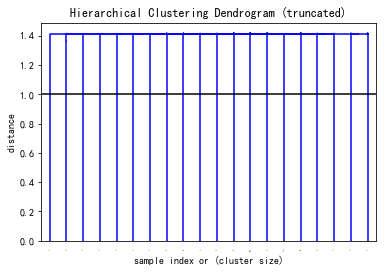

In [162]:
figure1 = (fancy_dendrogram(
    Z,
    labels = all_key,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=1.2,
    show_contracted=True,
    annotate_above=10,
    max_d= 1,  # plot a horizontal cut-off line
))
# print (figure1)
values_figure = []
for fig in figure1.values():
    values_figure.append(fig)

x_list = values_figure[2]
x_index = values_figure[3]
x_color = values_figure[4]
x_color.insert(0,x_color[0])

In [ ]:
#DI指数
import numpy as np

def normalize_to_smallest_integers(labels):
    """Normalizes a list of integers so that each number is reduced to the minimum possible integer, maintaining the order of elements.
    :param labels: the list to be normalized
    :returns: a numpy.array with the values normalized as the minimum integers between 0 and the maximum possible value.
    """

    max_v = len(set(labels)) if -1 not in labels else len(set(labels)) - 1
    sorted_labels = np.sort(np.unique(labels))
    unique_labels = range(max_v)
    new_c = np.zeros(len(labels), dtype=np.int32)

    for i, clust in enumerate(sorted_labels):
        new_c[labels == clust] = unique_labels[i]

    return new_c


def dunn(labels, distances):
    """
    Dunn index for cluster validation (the bigger, the better)
    
    .. math:: D = \\min_{i = 1 \\ldots n_c; j = i + 1\ldots n_c} \\left\\lbrace \\frac{d \\left( c_i,c_j \\right)}{\\max_{k = 1 \\ldots n_c} \\left(diam \\left(c_k \\right) \\right)} \\right\\rbrace
    
    where :math:`d(c_i,c_j)` represents the distance between
    clusters :math:`c_i` and :math:`c_j`, given by the distances between its
    two closest data points, and :math:`diam(c_k)` is the diameter of cluster
    :math:`c_k`, given by the distance between its two farthest data points.
    
    The bigger the value of the resulting Dunn index, the better the clustering
    result is considered, since higher values indicate that clusters are
    compact (small :math:`diam(c_k)`) and far apart.
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    
    .. [Kovacs2005] Kovács, F., Legány, C., & Babos, A. (2005). Cluster validity measurement techniques. 6th International Symposium of Hungarian Researchers on Computational Intelligence.
    """

    labels = normalize_to_smallest_integers(labels)

    unique_cluster_distances = np.unique(min_cluster_distances(labels, distances))
    max_diameter = max(diameter(labels, distances))

    if np.size(unique_cluster_distances) > 1:
        return unique_cluster_distances[1] / max_diameter
    else:
        return unique_cluster_distances[0] / max_diameter


def min_cluster_distances(labels, distances):
    """Calculates the distances between the two nearest points of each cluster.
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    """
    labels = normalize_to_smallest_integers(labels)
    n_unique_labels = len(np.unique(labels))

    min_distances = np.zeros((n_unique_labels, n_unique_labels))
    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i + 1, len(labels)):
            if labels[i] != labels[ii] and distances[i, ii] > min_distances[labels[i], labels[ii]]:
                min_distances[labels[i], labels[ii]] = min_distances[labels[ii], labels[i]] = distances[i, ii]
    return min_distances


def diameter(labels, distances):
    """Calculates cluster diameters (the distance between the two farthest data points in a cluster)
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :returns:
    """
    labels = normalize_to_smallest_integers(labels)
    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i + 1, len(labels)):
            if labels[i] == labels[ii] and distances[i, ii] > diameters[labels[i]]:
                diameters[labels[i]] = distances[i, ii]
    return diameters

In [ ]:
di_list = []
cluster_list = []
distances = [6,7,8,9,10,11,12,13,14,15,16,17,18,19]
for distance_d in distances:
    figure1 = (fancy_dendrogram(
        Z,
        labels = all_key,
        truncate_mode='lastp',
        p=2000,
        leaf_rotation=90.,
        leaf_font_size=2.2,
        show_contracted=True,
        annotate_above=10,
        max_d= distance_d,  # plot a horizontal cut-off line
    ))
    # print (figure1)
    values_figure = []
    for fig in figure1.values():
        values_figure.append(fig)

    x_list = values_figure[2]
    x_index = values_figure[3]
    x_color = values_figure[4]
    x_color.insert(0,x_color[0])
    
    # 将不同cluster元素放一起（color_list）
    clu = [(list(v)) for k,v in groupby(x_color)]
    disp = []
    a = 0
    for strin in range(0,len(x_index)):
        x_index[strin] = str(x_index[strin])   
    for c in clu:
        temp = []
        for l in range(0,len(c)):
            if a>len(x_color):
                break
            t = l+a
            temp.append(x_index[t])
        a += len(c)
        disp.append(temp)
        
    # 按cluster将词分好
    disp_list = [] # 存放分好的词
    a = 0
    for c in clu:
        temp = []
        for l in range(0,len(c)):
            if a>len(x_color):
                break
            t = l+a
            temp.append(x_list[t])
        a += len(c)
        disp_list.append(temp)
    n_clusters = len(disp_list)
    k_list = []
    for inte in disp_list:
        for inte2 in inte:
            k_list.append(inte2)     
    
    k_value = []
    for c in range(0,len(all_key)):
        for d in k_list:
            if all_key[c] == d:
                k_value.append(all_mat[c]) 
        
    # 按cluster将词的index分好
    for strin in range(0,len(x_index)):
        x_index[strin] = int(x_index[strin])
    disp_values = []        
    a = 0
    for c in disp:
        temp = []
        for l in range(0,len(c)):
            if a>len(x_color):
                break
            t = l+a
            temp.append(all_mat[x_index[t]])
        a += len(c)
        disp_values.append(temp) 
        
    clu_list = [(list(v)) for k,v in groupby(x_color)]
    res_clusters = []
    for cl in range(0,len(clu_list)):
        temp_cl = []
        for i in range(0,len(clu_list[cl])):
            temp_cl.append(cl)
        res_clusters.append(temp_cl)
    k_res = []
    for j in res_clusters:
        for x in j:
            k_res.append(x)

    dunk = dunn(k_res, euclidean_distances(k_value))
    di_list.append(dunk)
    cluster_list.append(n_clusters)
    
print (di_list)
print (cluster_list)

In [ ]:
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']


# di_list = [0.4866599472044431, 0.5064838085954556, 0.5064838085954556, 0.6363254524054349, 0.6169771987226317, 0.5814802263186812, 0.7313846968589413, 0.7405891274563829, 0.6373614458794155, 0.6214510530001571, 0.6636865398027285, 0.6636865398027285, 0.6636865398027285, 0.7848477496143985]

# di_list=[0.5064838085954556, 0.6363254524054349, 0.6169771987226317, 0.5814802263186812, 0.7313846968589413, 0.7205891274563829, 0.6373614458794155, 0.6214510530001571, 0.6636865398027285]
# # cluster_list=[72, 50, 36, 32, 23, 20, 15, 13, 10, 8, 8]
# distances = [8,9,10,11,12,13,14,15,16]

plt.plot(distances, di_list, marker='o', mec='r', mfc='w',label=u'Dunn Validity Index曲线图')
plt.legend()  # 让图例生效
plt.subplots_adjust(bottom=0.15)
plt.xlabel(u"distance") #X轴标签
plt.ylabel("Dunn Validity Index指数值") #Y轴标签
plt.title("Dunn Validity Index指数") #标题
plt.savefig(r'./导出的图片/DVI.pdf',dpi=300,bbox_inches = 'tight')
plt.savefig(r'./导出的图片/DVI.png',dpi=300,bbox_inches = 'tight')
plt.show()